**Best One (chinese-roberta & restnet 50)**

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Starting training with Chinese-RoBERTa and ResNet-50...


Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]


Epoch 1/10
Train Loss: 0.6860 | Train Accuracy: 0.6378
Validation Loss: 0.6779 | Validation Accuracy: 0.8706 | F1 Score: 0.6944



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]


Epoch 2/10
Train Loss: 0.6656 | Train Accuracy: 0.8118
Validation Loss: 0.6474 | Validation Accuracy: 0.8765 | F1 Score: 0.7123



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.82it/s]


Epoch 3/10
Train Loss: 0.6118 | Train Accuracy: 0.8882
Validation Loss: 0.5699 | Validation Accuracy: 0.8882 | F1 Score: 0.7467



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.77it/s]


Epoch 4/10
Train Loss: 0.4959 | Train Accuracy: 0.9118
Validation Loss: 0.4252 | Validation Accuracy: 0.9176 | F1 Score: 0.8333



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.88it/s]


Epoch 5/10
Train Loss: 0.3563 | Train Accuracy: 0.9244
Validation Loss: 0.3205 | Validation Accuracy: 0.9176 | F1 Score: 0.8444



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]


Epoch 6/10
Train Loss: 0.2625 | Train Accuracy: 0.9387
Validation Loss: 0.2710 | Validation Accuracy: 0.8941 | F1 Score: 0.8200



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]


Epoch 7/10
Train Loss: 0.2124 | Train Accuracy: 0.9370
Validation Loss: 0.2482 | Validation Accuracy: 0.8882 | F1 Score: 0.8190



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]


Epoch 8/10
Train Loss: 0.1813 | Train Accuracy: 0.9420
Validation Loss: 0.2237 | Validation Accuracy: 0.9059 | F1 Score: 0.8431



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.78it/s]


Epoch 9/10
Train Loss: 0.1551 | Train Accuracy: 0.9588
Validation Loss: 0.2150 | Validation Accuracy: 0.9412 | F1 Score: 0.8936



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]


Epoch 10/10
Train Loss: 0.1377 | Train Accuracy: 0.9546
Validation Loss: 0.2141 | Validation Accuracy: 0.9412 | F1 Score: 0.8936


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]


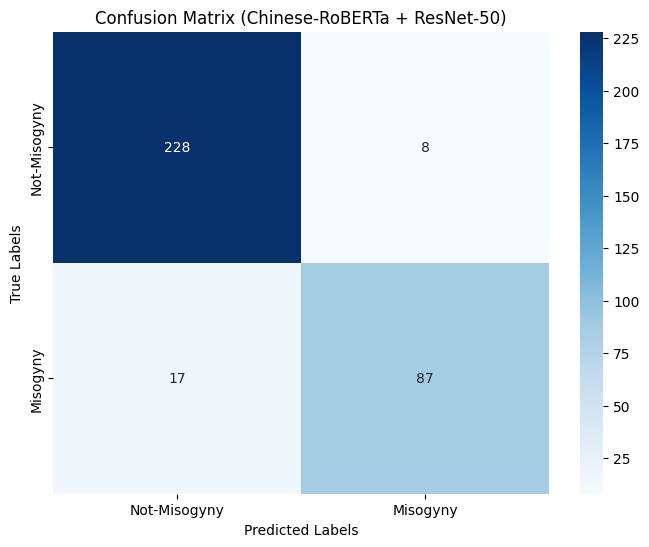


Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.93      0.97      0.95       236
    Misogyny       0.92      0.84      0.87       104

    accuracy                           0.93       340
   macro avg       0.92      0.90      0.91       340
weighted avg       0.93      0.93      0.93       340


Misclassified Samples (at least 2 different):
Actual: 1
Predicted: 0
Image Name: 1180.jpg

Actual: 0
Predicted: 1
Image Name: 74.jpg



In [16]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'
TRAIN_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train'
EVAL_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev'
TEST_IMAGE_DIR = '/kaggle/input/labelled-test/test-with-labels'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)
eval_data = pd.read_csv(EVAL_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class
class MisogynyMemeDataset(Dataset):
    def __init__(self, dataframe, tokenizer, image_transform, image_dir, max_len=128, has_labels=True):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.image_transform = image_transform
        self.image_dir = image_dir
        self.max_len = max_len
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]['image_name']
        text = self.data.iloc[idx]['transcriptions']

        # Text Preprocessing
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        # Image Processing
        image_path = f"{self.image_dir}/{img_name}"
        image = Image.open(image_path).convert("RGB")
        image = self.image_transform(image)

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'image': image,
                'label': torch.tensor(label, dtype=torch.long),
                'image_name': img_name
            }
        else:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'image': image,
                'image_name': img_name
            }

# Model Setup
tokenizer = AutoTokenizer.from_pretrained('hfl/chinese-roberta-wwm-ext')
text_model = AutoModel.from_pretrained('hfl/chinese-roberta-wwm-ext').to(device)

image_model = models.resnet50(pretrained=True)
image_model.fc = nn.Identity()
image_model = image_model.to(device)

# Image Transform
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Multimodal Classifier with Attention Fusion
class MultimodalClassifier(nn.Module):
    def __init__(self, text_dim=768, image_dim=2048, hidden_dim=512, num_classes=2):
        super(MultimodalClassifier, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=8, batch_first=True)
        self.fusion_fc = nn.Linear(hidden_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, text_features, image_features):
        text_out = self.relu(self.text_fc(text_features))
        image_out = self.relu(self.image_fc(image_features))
        text_out = text_out.unsqueeze(1)
        image_out = image_out.unsqueeze(1)
        combined = torch.cat((text_out, image_out), dim=1)
        attn_output, _ = self.attention(combined, combined, combined)
        attn_output = attn_output.mean(dim=1)
        fused = self.relu(self.fusion_fc(attn_output))
        fused = self.dropout(fused)
        output = self.output_fc(fused)
        return output

# Model Initialize
model = MultimodalClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyMemeDataset(train_data, tokenizer, image_transform, TRAIN_IMAGE_DIR, has_labels=True)
eval_dataset = MisogynyMemeDataset(eval_data, tokenizer, image_transform, EVAL_IMAGE_DIR, has_labels=True)
test_dataset = MisogynyMemeDataset(test_data, tokenizer, image_transform, TEST_IMAGE_DIR, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_image_names = []
    misclassified_samples = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            image_names = batch['image_name']

            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            image_outputs = image_model(images)
            outputs = model(text_outputs, image_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_image_names.extend(image_names)

            # Identify misclassified samples in this batch
            for i, (pred, label, img_name) in enumerate(zip(preds.cpu().numpy(), labels.cpu().numpy(), image_names)):
                if pred != label:
                    misclassified_samples.append({
                        'image_name': img_name,
                        'actual_label': label,
                        'predicted_label': pred
                    })

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, all_labels, all_preds, conf_matrix, misclassified_samples

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with Chinese-RoBERTa and ResNet-50...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    train_preds = []
    train_labels = []
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            image_outputs = image_model(images)

        outputs = model(text_outputs, image_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, val_labels, val_preds, _, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_labels, test_preds, test_conf_matrix, misclassified_samples = evaluate(model, test_loader)

# Plot confusion matrix using seaborn heatmap
class_names = ['Not-Misogyny', 'Misogyny']
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Chinese-RoBERTa + ResNet-50)')
plt.show()

# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Print Misclassified Samples
print("\nMisclassified Samples (at least 2 different):")
if len(misclassified_samples) == 0:
    print("No misclassified samples found.")
elif len(misclassified_samples) == 1:
    print("Only one misclassified sample found:")
    sample = misclassified_samples[0]
    print(f"Actual: {sample['actual_label']}")
    print(f"Predicted: {sample['predicted_label']}")
    print(f"Image Name: {sample['image_name']}")
    print()
else:
    # Try to select one False Negative (Actual: 1, Predicted: 0) and one False Positive (Actual: 0, Predicted: 1)
    fn_samples = [s for s in misclassified_samples if s['actual_label'] == 1 and s['predicted_label'] == 0]
    fp_samples = [s for s in misclassified_samples if s['actual_label'] == 0 and s['predicted_label'] == 1]
    
    selected_samples = []
    if fn_samples:
        selected_samples.append(fn_samples[0])
    if fp_samples and len(selected_samples) < 2:
        selected_samples.append(fp_samples[0])
    if len(selected_samples) < 2 and len(misclassified_samples) > len(selected_samples):
        # Add another misclassified sample if needed
        for s in misclassified_samples:
            if s not in selected_samples:
                selected_samples.append(s)
                break
    
    for sample in selected_samples[:2]:
        print(f"Actual: {sample['actual_label']}")
        print(f"Predicted: {sample['predicted_label']}")
        print(f"Image Name: {sample['image_name']}")
        print()

**bert base chinese & resnet101**

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Starting training with BERT-base-Chinese and ResNet-101...


Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]


Epoch 1/10
Train Loss: 0.6849 | Train Accuracy: 0.7294
Validation Loss: 0.6763 | Validation Accuracy: 0.7941 | F1 Score: 0.4444



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]


Epoch 2/10
Train Loss: 0.6611 | Train Accuracy: 0.8227
Validation Loss: 0.6404 | Validation Accuracy: 0.8471 | F1 Score: 0.6486



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]


Epoch 3/10
Train Loss: 0.6022 | Train Accuracy: 0.8529
Validation Loss: 0.5656 | Validation Accuracy: 0.8529 | F1 Score: 0.7312



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]


Epoch 4/10
Train Loss: 0.4979 | Train Accuracy: 0.8706
Validation Loss: 0.4573 | Validation Accuracy: 0.8588 | F1 Score: 0.7600



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]


Epoch 5/10
Train Loss: 0.3993 | Train Accuracy: 0.8874
Validation Loss: 0.3796 | Validation Accuracy: 0.8412 | F1 Score: 0.7379



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]


Epoch 6/10
Train Loss: 0.3355 | Train Accuracy: 0.8840
Validation Loss: 0.3226 | Validation Accuracy: 0.8824 | F1 Score: 0.7917



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]


Epoch 7/10
Train Loss: 0.2865 | Train Accuracy: 0.9025
Validation Loss: 0.2840 | Validation Accuracy: 0.9000 | F1 Score: 0.8247



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


Epoch 8/10
Train Loss: 0.2477 | Train Accuracy: 0.9143
Validation Loss: 0.2806 | Validation Accuracy: 0.8647 | F1 Score: 0.7850



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]


Epoch 9/10
Train Loss: 0.2211 | Train Accuracy: 0.9151
Validation Loss: 0.2421 | Validation Accuracy: 0.9176 | F1 Score: 0.8542



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


Epoch 10/10
Train Loss: 0.2147 | Train Accuracy: 0.9235
Validation Loss: 0.2487 | Validation Accuracy: 0.8941 | F1 Score: 0.8269


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]


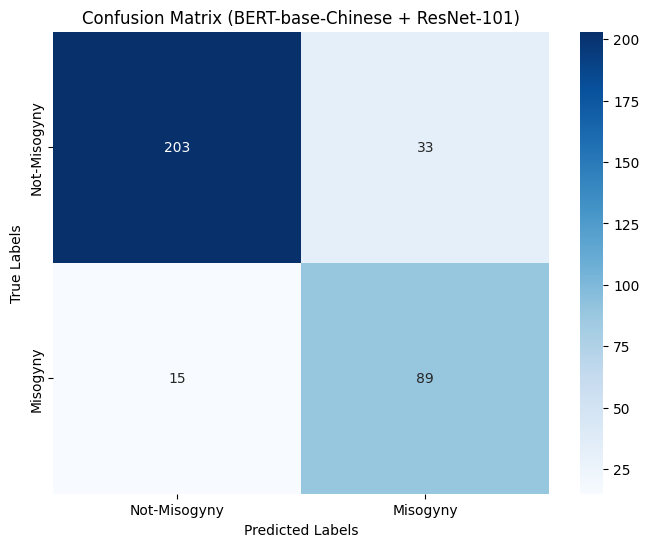


Test Set Metrics:
Precision (Misogyny): 0.7295
Recall (Misogyny): 0.8558
Macro F1 Score: 0.8409

Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.93      0.86      0.89       236
    Misogyny       0.73      0.86      0.79       104

    accuracy                           0.86       340
   macro avg       0.83      0.86      0.84       340
weighted avg       0.87      0.86      0.86       340



In [10]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'
TRAIN_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train'
EVAL_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev'
TEST_IMAGE_DIR = '/kaggle/input/labelled-test/test-with-labels'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)
eval_data = pd.read_csv(EVAL_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class
class MisogynyMemeDataset(Dataset):
    def __init__(self, dataframe, tokenizer, image_transform, image_dir, max_len=128, has_labels=True):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.image_transform = image_transform
        self.image_dir = image_dir
        self.max_len = max_len
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]['image_name']
        text = self.data.iloc[idx]['transcriptions']

        # Text Preprocessing
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        # Image Processing
        image_path = f"{self.image_dir}/{img_name}"
        image = Image.open(image_path).convert("RGB")
        image = self.image_transform(image)

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'image': image,
                'label': torch.tensor(label, dtype=torch.long)
            }
        else:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'image': image
            }

# Model Setup
tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese')
text_model = AutoModel.from_pretrained('bert-base-chinese').to(device)

image_model = models.resnet101(pretrained=True)
image_model.fc = nn.Identity()
image_model = image_model.to(device)

# Image Transform
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Multimodal Classifier with Attention Fusion
class MultimodalClassifier(nn.Module):
    def __init__(self, text_dim=768, image_dim=2048, hidden_dim=512, num_classes=2):
        super(MultimodalClassifier, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=8, batch_first=True)
        self.fusion_fc = nn.Linear(hidden_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, text_features, image_features):
        text_out = self.relu(self.text_fc(text_features))
        image_out = self.relu(self.image_fc(image_features))
        text_out = text_out.unsqueeze(1)
        image_out = image_out.unsqueeze(1)
        combined = torch.cat((text_out, image_out), dim=1)
        attn_output, _ = self.attention(combined, combined, combined)
        attn_output = attn_output.mean(dim=1)
        fused = self.relu(self.fusion_fc(attn_output))
        fused = self.dropout(fused)
        output = self.output_fc(fused)
        return output

# Model Initialize
model = MultimodalClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyMemeDataset(train_data, tokenizer, image_transform, TRAIN_IMAGE_DIR, has_labels=True)
eval_dataset = MisogynyMemeDataset(eval_data, tokenizer, image_transform, EVAL_IMAGE_DIR, has_labels=True)
test_dataset = MisogynyMemeDataset(test_data, tokenizer, image_transform, TEST_IMAGE_DIR, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            image_outputs = image_model(images)
            outputs = model(text_outputs, image_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, macro_precision, macro_recall, macro_f1, all_labels, all_preds, conf_matrix

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with BERT-base-Chinese and ResNet-101...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            image_outputs = image_model(images)

        outputs = model(text_outputs, image_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, _, _, _, val_labels, val_preds, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_macro_precision, test_macro_recall, test_macro_f1, test_labels, test_preds, test_conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix using seaborn heatmap
class_names = ['Not-Misogyny', 'Misogyny']
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BERT-base-Chinese + ResNet-101)')
plt.show()

# Print Precision, Recall, Macro F1 Score
print("\nTest Set Metrics:")
print(f"Precision (Misogyny): {test_precision:.4f}")
print(f"Recall (Misogyny): {test_recall:.4f}")
print(f"Macro F1 Score: {test_macro_f1:.4f}")

# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))

**bert base chinese & restnet 50**

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Starting training with BERT-base-Chinese and ResNet-50...


Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.25it/s]


Epoch 1/10
Train Loss: 0.6882 | Train Accuracy: 0.5345
Validation Loss: 0.6784 | Validation Accuracy: 0.8235 | F1 Score: 0.5455



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]


Epoch 2/10
Train Loss: 0.6681 | Train Accuracy: 0.8143
Validation Loss: 0.6512 | Validation Accuracy: 0.8294 | F1 Score: 0.6882



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]


Epoch 3/10
Train Loss: 0.6212 | Train Accuracy: 0.8487
Validation Loss: 0.5850 | Validation Accuracy: 0.8353 | F1 Score: 0.7143



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]


Epoch 4/10
Train Loss: 0.5219 | Train Accuracy: 0.8630
Validation Loss: 0.4758 | Validation Accuracy: 0.8235 | F1 Score: 0.7115



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.83it/s]


Epoch 5/10
Train Loss: 0.4082 | Train Accuracy: 0.8664
Validation Loss: 0.3879 | Validation Accuracy: 0.8882 | F1 Score: 0.7912



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]


Epoch 6/10
Train Loss: 0.3338 | Train Accuracy: 0.8899
Validation Loss: 0.3257 | Validation Accuracy: 0.8824 | F1 Score: 0.7959



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]


Epoch 7/10
Train Loss: 0.2788 | Train Accuracy: 0.9034
Validation Loss: 0.2943 | Validation Accuracy: 0.9118 | F1 Score: 0.8387



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.81it/s]


Epoch 8/10
Train Loss: 0.2387 | Train Accuracy: 0.9168
Validation Loss: 0.2801 | Validation Accuracy: 0.8941 | F1 Score: 0.8235



Evaluation: 100%|██████████| 11/11 [00:04<00:00,  2.73it/s]


Epoch 9/10
Train Loss: 0.2237 | Train Accuracy: 0.9118
Validation Loss: 0.2678 | Validation Accuracy: 0.9176 | F1 Score: 0.8542



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]


Epoch 10/10
Train Loss: 0.1954 | Train Accuracy: 0.9210
Validation Loss: 0.2904 | Validation Accuracy: 0.9235 | F1 Score: 0.8602


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:08<00:00,  2.70it/s]


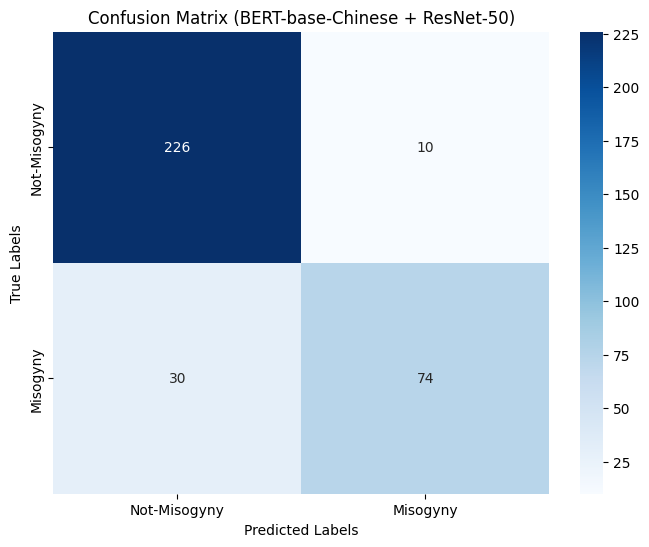


Test Set Metrics:
Precision (Misogyny): 0.8810
Recall (Misogyny): 0.7115
Macro F1 Score: 0.8530

Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.88      0.96      0.92       236
    Misogyny       0.88      0.71      0.79       104

    accuracy                           0.88       340
   macro avg       0.88      0.83      0.85       340
weighted avg       0.88      0.88      0.88       340



In [11]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'
TRAIN_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train'
EVAL_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev'
TEST_IMAGE_DIR = '/kaggle/input/labelled-test/test-with-labels'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)
eval_data = pd.read_csv(EVAL_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class
class MisogynyMemeDataset(Dataset):
    def __init__(self, dataframe, tokenizer, image_transform, image_dir, max_len=128, has_labels=True):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.image_transform = image_transform
        self.image_dir = image_dir
        self.max_len = max_len
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]['image_name']
        text = self.data.iloc[idx]['transcriptions']

        # Text Preprocessing
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        # Image Processing
        image_path = f"{self.image_dir}/{img_name}"
        image = Image.open(image_path).convert("RGB")
        image = self.image_transform(image)

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'image': image,
                'label': torch.tensor(label, dtype=torch.long)
            }
        else:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'image': image
            }

# Model Setup
tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese')
text_model = AutoModel.from_pretrained('bert-base-chinese').to(device)

image_model = models.resnet50(pretrained=True)
image_model.fc = nn.Identity()
image_model = image_model.to(device)

# Image Transform
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Multimodal Classifier with Attention Fusion
class MultimodalClassifier(nn.Module):
    def __init__(self, text_dim=768, image_dim=2048, hidden_dim=512, num_classes=2):
        super(MultimodalClassifier, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=8, batch_first=True)
        self.fusion_fc = nn.Linear(hidden_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, text_features, image_features):
        text_out = self.relu(self.text_fc(text_features))
        image_out = self.relu(self.image_fc(image_features))
        text_out = text_out.unsqueeze(1)
        image_out = image_out.unsqueeze(1)
        combined = torch.cat((text_out, image_out), dim=1)
        attn_output, _ = self.attention(combined, combined, combined)
        attn_output = attn_output.mean(dim=1)
        fused = self.relu(self.fusion_fc(attn_output))
        fused = self.dropout(fused)
        output = self.output_fc(fused)
        return output

# Model Initialize
model = MultimodalClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyMemeDataset(train_data, tokenizer, image_transform, TRAIN_IMAGE_DIR, has_labels=True)
eval_dataset = MisogynyMemeDataset(eval_data, tokenizer, image_transform, EVAL_IMAGE_DIR, has_labels=True)
test_dataset = MisogynyMemeDataset(test_data, tokenizer, image_transform, TEST_IMAGE_DIR, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            image_outputs = image_model(images)
            outputs = model(text_outputs, image_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, macro_precision, macro_recall, macro_f1, all_labels, all_preds, conf_matrix

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with BERT-base-Chinese and ResNet-50...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            image_outputs = image_model(images)

        outputs = model(text_outputs, image_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, _, _, _, val_labels, val_preds, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_macro_precision, test_macro_recall, test_macro_f1, test_labels, test_preds, test_conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix using seaborn heatmap
class_names = ['Not-Misogyny', 'Misogyny']
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BERT-base-Chinese + ResNet-50)')
plt.show()

# Print Precision, Recall, Macro F1 Score
print("\nTest Set Metrics:")
print(f"Precision (Misogyny): {test_precision:.4f}")
print(f"Recall (Misogyny): {test_recall:.4f}")
print(f"Macro F1 Score: {test_macro_f1:.4f}")

# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))

**Bert_base Chinese (Text Only)**

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]


Starting training with BERT-base-Chinese (Text Only)...


Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.40it/s]


Epoch 1/10
Train Loss: 0.6900 | Train Accuracy: 0.7101
Validation Loss: 0.6695 | Validation Accuracy: 0.7235 | F1 Score: 0.4051



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  7.96it/s]


Epoch 2/10
Train Loss: 0.6433 | Train Accuracy: 0.7185
Validation Loss: 0.6302 | Validation Accuracy: 0.7529 | F1 Score: 0.5714



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  7.92it/s]


Epoch 3/10
Train Loss: 0.6020 | Train Accuracy: 0.7882
Validation Loss: 0.5968 | Validation Accuracy: 0.7529 | F1 Score: 0.5882



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.25it/s]


Epoch 4/10
Train Loss: 0.5710 | Train Accuracy: 0.8050
Validation Loss: 0.5668 | Validation Accuracy: 0.7647 | F1 Score: 0.6078



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.44it/s]


Epoch 5/10
Train Loss: 0.5358 | Train Accuracy: 0.8185
Validation Loss: 0.5395 | Validation Accuracy: 0.7706 | F1 Score: 0.6139



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.48it/s]


Epoch 6/10
Train Loss: 0.5164 | Train Accuracy: 0.8176
Validation Loss: 0.5152 | Validation Accuracy: 0.7882 | F1 Score: 0.6327



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.62it/s]


Epoch 7/10
Train Loss: 0.4879 | Train Accuracy: 0.8471
Validation Loss: 0.4947 | Validation Accuracy: 0.7941 | F1 Score: 0.6602



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.61it/s]


Epoch 8/10
Train Loss: 0.4713 | Train Accuracy: 0.8403
Validation Loss: 0.4751 | Validation Accuracy: 0.8059 | F1 Score: 0.6733



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.48it/s]


Epoch 9/10
Train Loss: 0.4501 | Train Accuracy: 0.8462
Validation Loss: 0.4576 | Validation Accuracy: 0.8176 | F1 Score: 0.6869



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.37it/s]


Epoch 10/10
Train Loss: 0.4398 | Train Accuracy: 0.8563
Validation Loss: 0.4431 | Validation Accuracy: 0.8118 | F1 Score: 0.6863


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:02<00:00,  8.34it/s]


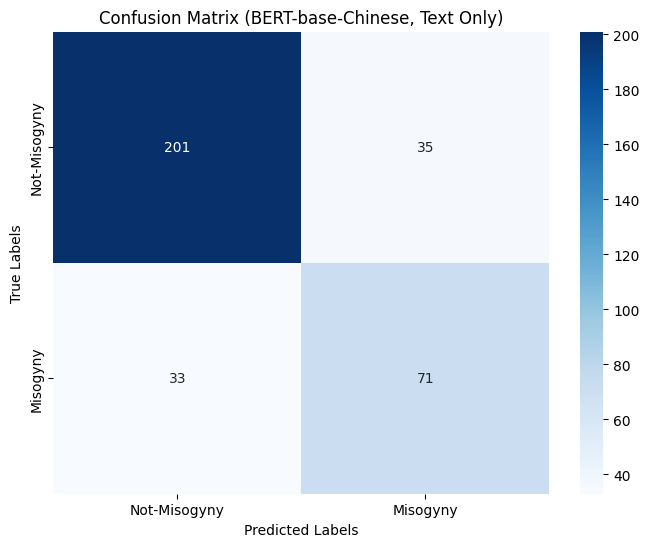


Test Set Metrics:
Precision (Misogyny): 0.6698
Recall (Misogyny): 0.6827
Macro F1 Score: 0.7658

Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.86      0.85      0.86       236
    Misogyny       0.67      0.68      0.68       104

    accuracy                           0.80       340
   macro avg       0.76      0.77      0.77       340
weighted avg       0.80      0.80      0.80       340



In [4]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)[['transcriptions', 'labels']]
eval_data = pd.read_csv(EVAL_DATA_PATH)[['transcriptions', 'labels']]
test_data = pd.read_csv(TEST_DATA_PATH)[['transcriptions', 'labels']]

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class (Text Only)
class MisogynyTextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=128, has_labels=True):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['transcriptions']

        # Text Preprocessing
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'label': torch.tensor(label, dtype=torch.long)
            }
        else:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten()
            }

# Model Setup
text_model_name = 'bert-base-chinese'
tokenizer = AutoTokenizer.from_pretrained(text_model_name)
text_model = AutoModel.from_pretrained(text_model_name).to(device)

# Text-Only Classifier
class TextClassifier(nn.Module):
    def __init__(self, text_dim=768, hidden_dim=512, num_classes=2):
        super(TextClassifier, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, text_features):
        text_out = self.relu(self.text_fc(text_features))
        text_out = self.dropout(text_out)
        output = self.output_fc(text_out)
        return output

# Model Initialize
model = TextClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyTextDataset(train_data, tokenizer, has_labels=True)
eval_dataset = MisogynyTextDataset(eval_data, tokenizer, has_labels=True)
test_dataset = MisogynyTextDataset(test_data, tokenizer, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            outputs = model(text_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, macro_precision, macro_recall, macro_f1, all_labels, all_preds, conf_matrix

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with BERT-base-Chinese (Text Only)...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]

        outputs = model(text_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, _, _, _, val_labels, val_preds, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_macro_precision, test_macro_recall, test_macro_f1, test_labels, test_preds, test_conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix using seaborn heatmap
class_names = ['Not-Misogyny', 'Misogyny']
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BERT-base-Chinese, Text Only)')
plt.show()

# Print Precision, Recall, Macro F1 Score
print("\nTest Set Metrics:")
print(f"Precision (Misogyny): {test_precision:.4f}")
print(f"Recall (Misogyny): {test_recall:.4f}")
print(f"Macro F1 Score: {test_macro_f1:.4f}")

# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))

**chinese-roberta**

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64

Starting training with Chinese-RoBERTa (Text Only)...


Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.69it/s]


Epoch 1/10
Train Loss: 0.6774 | Train Accuracy: 0.6639
Validation Loss: 0.6514 | Validation Accuracy: 0.7941 | F1 Score: 0.6316



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.45it/s]


Epoch 2/10
Train Loss: 0.6319 | Train Accuracy: 0.7429
Validation Loss: 0.6077 | Validation Accuracy: 0.8647 | F1 Score: 0.7229



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.32it/s]


Epoch 3/10
Train Loss: 0.5927 | Train Accuracy: 0.8437
Validation Loss: 0.5690 | Validation Accuracy: 0.8765 | F1 Score: 0.7692



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.64it/s]


Epoch 4/10
Train Loss: 0.5507 | Train Accuracy: 0.8672
Validation Loss: 0.5371 | Validation Accuracy: 0.8588 | F1 Score: 0.7600



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.70it/s]


Epoch 5/10
Train Loss: 0.5176 | Train Accuracy: 0.8773
Validation Loss: 0.5030 | Validation Accuracy: 0.8941 | F1 Score: 0.7907



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.88it/s]


Epoch 6/10
Train Loss: 0.4853 | Train Accuracy: 0.8899
Validation Loss: 0.4754 | Validation Accuracy: 0.8941 | F1 Score: 0.8000



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.90it/s]


Epoch 7/10
Train Loss: 0.4585 | Train Accuracy: 0.8832
Validation Loss: 0.4505 | Validation Accuracy: 0.9059 | F1 Score: 0.8261



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.92it/s]


Epoch 8/10
Train Loss: 0.4290 | Train Accuracy: 0.9076
Validation Loss: 0.4281 | Validation Accuracy: 0.9059 | F1 Score: 0.8261



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.89it/s]


Epoch 9/10
Train Loss: 0.4088 | Train Accuracy: 0.9143
Validation Loss: 0.4085 | Validation Accuracy: 0.9176 | F1 Score: 0.8511



Evaluation: 100%|██████████| 11/11 [00:01<00:00,  8.87it/s]


Epoch 10/10
Train Loss: 0.3904 | Train Accuracy: 0.9118
Validation Loss: 0.3916 | Validation Accuracy: 0.9059 | F1 Score: 0.8333


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:02<00:00,  8.73it/s]


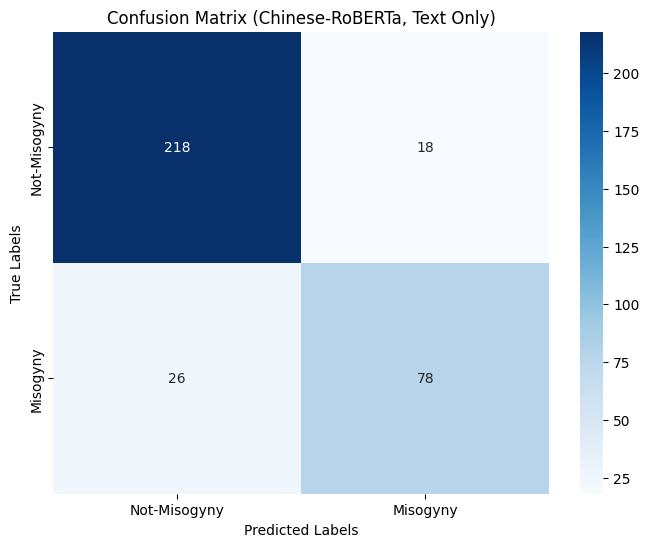


Test Set Metrics:
Precision (Misogyny): 0.8125
Recall (Misogyny): 0.7500
Macro F1 Score: 0.8442

Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.89      0.92      0.91       236
    Misogyny       0.81      0.75      0.78       104

    accuracy                           0.87       340
   macro avg       0.85      0.84      0.84       340
weighted avg       0.87      0.87      0.87       340



In [5]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)[['transcriptions', 'labels']]
eval_data = pd.read_csv(EVAL_DATA_PATH)[['transcriptions', 'labels']]
test_data = pd.read_csv(TEST_DATA_PATH)[['transcriptions', 'labels']]

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class (Text Only)
class MisogynyTextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=128, has_labels=True):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['transcriptions']

        # Text Preprocessing
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'label': torch.tensor(label, dtype=torch.long)
            }
        else:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten()
            }

# Model Setup
text_model_name = 'hfl/chinese-roberta-wwm-ext'
tokenizer = AutoTokenizer.from_pretrained(text_model_name)
text_model = AutoModel.from_pretrained(text_model_name).to(device)

# Text-Only Classifier
class TextClassifier(nn.Module):
    def __init__(self, text_dim=768, hidden_dim=512, num_classes=2):
        super(TextClassifier, self).__init__()
        self.text_fc = nn.Linear(text_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, text_features):
        text_out = self.relu(self.text_fc(text_features))
        text_out = self.dropout(text_out)
        output = self.output_fc(text_out)
        return output

# Model Initialize
model = TextClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyTextDataset(train_data, tokenizer, has_labels=True)
eval_dataset = MisogynyTextDataset(eval_data, tokenizer, has_labels=True)
test_dataset = MisogynyTextDataset(test_data, tokenizer, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
            outputs = model(text_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, macro_precision, macro_recall, macro_f1, all_labels, all_preds, conf_matrix

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with Chinese-RoBERTa (Text Only)...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            text_outputs = text_model(input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]

        outputs = model(text_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, _, _, _, val_labels, val_preds, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_macro_precision, test_macro_recall, test_macro_f1, test_labels, test_preds, test_conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix using seaborn heatmap
class_names = ['Not-Misogyny', 'Misogyny']
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Chinese-RoBERTa, Text Only)')
plt.show()

# Print Precision, Recall, Macro F1 Score
print("\nTest Set Metrics:")
print(f"Precision (Misogyny): {test_precision:.4f}")
print(f"Recall (Misogyny): {test_recall:.4f}")
print(f"Macro F1 Score: {test_macro_f1:.4f}")

# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))

**resnet101**


In [6]:
import pandas as pd
import torch
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'
TRAIN_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train'
EVAL_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev'
TEST_IMAGE_DIR = '/kaggle/input/labelled-test/test-with-labels'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)[['image_name', 'labels']]
eval_data = pd.read_csv(EVAL_DATA_PATH)[['image_name', 'labels']]
test_data = pd.read_csv(TEST_DATA_PATH)[['image_name', 'labels']]

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class (Image Only)
class MisogynyImageDataset(Dataset):
    def __init__(self, dataframe, image_transform, image_dir, has_labels=True):
        self.data = dataframe
        self.image_transform = image_transform
        self.image_dir = image_dir
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]['image_name']

        # Image Processing
        image_path = f"{self.image_dir}/{img_name}"
        image = Image.open(image_path).convert("RGB")
        image = self.image_transform(image)

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'image': image,
                'label': torch.tensor(label, dtype=torch.long)
            }
        else:
            return {'image': image}

# Model Setup
image_model_name = 'resnet101'
image_model = models.resnet101(pretrained=True)
image_model.fc = nn.Identity()  # Remove final fully connected layer
image_model = image_model.to(device)

# Image Transform
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Image-Only Classifier
class ImageClassifier(nn.Module):
    def __init__(self, image_dim=2048, hidden_dim=512, num_classes=2):
        super(ImageClassifier, self).__init__()
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, image_features):
        image_out = self.relu(self.image_fc(image_features))
        image_out = self.dropout(image_out)
        output = self.output_fc(image_out)
        return output

# Model Initialize
model = ImageClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyImageDataset(train_data, image_transform, TRAIN_IMAGE_DIR, has_labels=True)
eval_dataset = MisogynyImageDataset(eval_data, image_transform, EVAL_IMAGE_DIR, has_labels=True)
test_dataset = MisogynyImageDataset(test_data, image_transform, TEST_IMAGE_DIR, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            image_outputs = image_model(images)
            outputs = model(image_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, macro_precision, macro_recall, macro_f1, all_labels, all_preds, conf_matrix

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with ResNet-101 (Image Only)...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            image_outputs = image_model(images)

        outputs = model(image_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, _, _, _, val_labels, val_preds, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_macro_precision, test_macro_recall, test_macro_f1, test_labels, test_preds, test_conf_matrix = evaluate(model, test_loader)


# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 78.8MB/s] 



Starting training with ResNet-101 (Image Only)...


Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]


Epoch 1/10
Train Loss: 0.6753 | Train Accuracy: 0.6176
Validation Loss: 0.6586 | Validation Accuracy: 0.7529 | F1 Score: 0.3824



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]


Epoch 2/10
Train Loss: 0.6480 | Train Accuracy: 0.6874
Validation Loss: 0.6389 | Validation Accuracy: 0.7882 | F1 Score: 0.5000



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s]


Epoch 3/10
Train Loss: 0.6180 | Train Accuracy: 0.7487
Validation Loss: 0.6199 | Validation Accuracy: 0.7706 | F1 Score: 0.5517



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]


Epoch 4/10
Train Loss: 0.5907 | Train Accuracy: 0.7748
Validation Loss: 0.6066 | Validation Accuracy: 0.7765 | F1 Score: 0.5778



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]


Epoch 5/10
Train Loss: 0.5741 | Train Accuracy: 0.7681
Validation Loss: 0.5970 | Validation Accuracy: 0.7235 | F1 Score: 0.5841



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]


Epoch 6/10
Train Loss: 0.5657 | Train Accuracy: 0.7815
Validation Loss: 0.5973 | Validation Accuracy: 0.6588 | F1 Score: 0.5606



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]


Epoch 7/10
Train Loss: 0.5507 | Train Accuracy: 0.7647
Validation Loss: 0.5821 | Validation Accuracy: 0.7353 | F1 Score: 0.5631



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.25it/s]


Epoch 8/10
Train Loss: 0.5272 | Train Accuracy: 0.8000
Validation Loss: 0.5765 | Validation Accuracy: 0.7471 | F1 Score: 0.5657



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]


Epoch 9/10
Train Loss: 0.5325 | Train Accuracy: 0.7832
Validation Loss: 0.5754 | Validation Accuracy: 0.7176 | F1 Score: 0.5862



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.67it/s]


Epoch 10/10
Train Loss: 0.5218 | Train Accuracy: 0.7866
Validation Loss: 0.5695 | Validation Accuracy: 0.7471 | F1 Score: 0.5981


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:06<00:00,  3.19it/s]


Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.84      0.77      0.81       236
    Misogyny       0.56      0.67      0.61       104

    accuracy                           0.74       340
   macro avg       0.70      0.72      0.71       340
weighted avg       0.76      0.74      0.75       340



**resnet 50**

Dataset Label Distribution:

Training Data:
labels
Not-Misogyny    841
Misogyny        349
Name: count, dtype: int64

Validation Data:
labels
Not-Misogyny    123
Misogyny         47
Name: count, dtype: int64

Test Data:
labels
Not-Misogyny    236
Misogyny        104
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Starting training with ResNet-50 (Image Only)...


Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]


Epoch 1/10
Train Loss: 0.6839 | Train Accuracy: 0.5714
Validation Loss: 0.6640 | Validation Accuracy: 0.7765 | F1 Score: 0.4242



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.87it/s]


Epoch 2/10
Train Loss: 0.6526 | Train Accuracy: 0.7067
Validation Loss: 0.6484 | Validation Accuracy: 0.7118 | F1 Score: 0.5812



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


Epoch 3/10
Train Loss: 0.6282 | Train Accuracy: 0.7126
Validation Loss: 0.6293 | Validation Accuracy: 0.8059 | F1 Score: 0.6118



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.51it/s]


Epoch 4/10
Train Loss: 0.6140 | Train Accuracy: 0.7303
Validation Loss: 0.6192 | Validation Accuracy: 0.7588 | F1 Score: 0.5941



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.87it/s]


Epoch 5/10
Train Loss: 0.5939 | Train Accuracy: 0.7655
Validation Loss: 0.6081 | Validation Accuracy: 0.7529 | F1 Score: 0.5962



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.94it/s]


Epoch 6/10
Train Loss: 0.5772 | Train Accuracy: 0.7689
Validation Loss: 0.6000 | Validation Accuracy: 0.7824 | F1 Score: 0.6186



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.80it/s]


Epoch 7/10
Train Loss: 0.5654 | Train Accuracy: 0.7798
Validation Loss: 0.5927 | Validation Accuracy: 0.7824 | F1 Score: 0.6337



Evaluation: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s]


Epoch 8/10
Train Loss: 0.5501 | Train Accuracy: 0.7798
Validation Loss: 0.5870 | Validation Accuracy: 0.7529 | F1 Score: 0.6038



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.80it/s]


Epoch 9/10
Train Loss: 0.5491 | Train Accuracy: 0.7605
Validation Loss: 0.5828 | Validation Accuracy: 0.7529 | F1 Score: 0.6182



Evaluation: 100%|██████████| 11/11 [00:02<00:00,  3.82it/s]


Epoch 10/10
Train Loss: 0.5301 | Train Accuracy: 0.7546
Validation Loss: 0.5786 | Validation Accuracy: 0.7706 | F1 Score: 0.6214


Evaluating on Test Set...


Evaluation: 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]


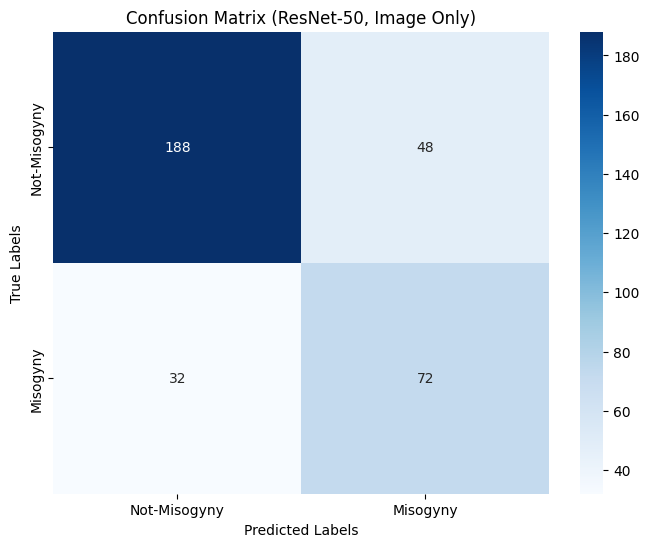


Classification Report for Test Set:
              precision    recall  f1-score   support

Not-Misogyny       0.85      0.80      0.82       236
    Misogyny       0.60      0.69      0.64       104

    accuracy                           0.76       340
   macro avg       0.73      0.74      0.73       340
weighted avg       0.78      0.76      0.77       340



In [9]:
import pandas as pd
import torch
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
TRAIN_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train.csv'
EVAL_DATA_PATH = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev.csv'
TEST_DATA_PATH = '/kaggle/input/labelled-test/test-with-labels/test.csv'
TRAIN_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/train'
EVAL_IMAGE_DIR = '/kaggle/input/misogyny-meme-detection-3/Misogyny Meme Detection/dev'
TEST_IMAGE_DIR = '/kaggle/input/labelled-test/test-with-labels'

# Load data
train_data = pd.read_csv(TRAIN_DATA_PATH)[['image_name', 'labels']]
eval_data = pd.read_csv(EVAL_DATA_PATH)[['image_name', 'labels']]
test_data = pd.read_csv(TEST_DATA_PATH)[['image_name', 'labels']]

# Print dataset distribution
print("Dataset Label Distribution:")
print("\nTraining Data:")
print(train_data['labels'].value_counts())
print("\nValidation Data:")
print(eval_data['labels'].value_counts())
print("\nTest Data:")
print(test_data['labels'].value_counts())

# Convert labels into binary
train_data['labels'] = train_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
eval_data['labels'] = eval_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})
test_data['labels'] = test_data['labels'].map({'Not-Misogyny': 0, 'Misogyny': 1})

# Device setup
device = torch.cuda.is_available() and torch.device("cuda") or torch.device("cpu")

# Custom Dataset Class (Image Only)
class MisogynyImageDataset(Dataset):
    def __init__(self, dataframe, image_transform, image_dir, has_labels=True):
        self.data = dataframe
        self.image_transform = image_transform
        self.image_dir = image_dir
        self.has_labels = has_labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]['image_name']

        # Image Processing
        image_path = f"{self.image_dir}/{img_name}"
        image = Image.open(image_path).convert("RGB")
        image = self.image_transform(image)

        if self.has_labels:
            label = self.data.iloc[idx]['labels']
            return {
                'image': image,
                'label': torch.tensor(label, dtype=torch.long)
            }
        else:
            return {'image': image}

# Model Setup
image_model_name = 'resnet50'
image_model = models.resnet50(pretrained=True)
image_model.fc = nn.Identity()  # Remove final fully connected layer
image_model = image_model.to(device)

# Image Transform
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Image-Only Classifier
class ImageClassifier(nn.Module):
    def __init__(self, image_dim=2048, hidden_dim=512, num_classes=2):
        super(ImageClassifier, self).__init__()
        self.image_fc = nn.Linear(image_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, image_features):
        image_out = self.relu(self.image_fc(image_features))
        image_out = self.dropout(image_out)
        output = self.output_fc(image_out)
        return output

# Model Initialize
model = ImageClassifier().to(device)

# Class weights for imbalanced dataset
class_counts = train_data['labels'].value_counts().sort_index()
class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Dataloaders
train_dataset = MisogynyImageDataset(train_data, image_transform, TRAIN_IMAGE_DIR, has_labels=True)
eval_dataset = MisogynyImageDataset(eval_data, image_transform, EVAL_IMAGE_DIR, has_labels=True)
test_dataset = MisogynyImageDataset(test_data, image_transform, TEST_IMAGE_DIR, has_labels=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluation"):
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            image_outputs = image_model(images)
            outputs = model(image_outputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, precision, recall, f1, macro_precision, macro_recall, macro_f1, all_labels, all_preds, conf_matrix

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10

print("\nStarting training with ResNet-50 (Image Only)...")
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")
    for batch in train_loop:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            image_outputs = image_model(images)

        outputs = model(image_outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation Phase
    avg_val_loss, val_accuracy, val_precision, val_recall, val_f1, _, _, _, val_labels, val_preds, _ = evaluate(model, eval_loader)

    # Print results in specified format
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f} | F1 Score: {val_f1:.4f}")
    print()

# Test Evaluation
print("\nEvaluating on Test Set...")
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_macro_precision, test_macro_recall, test_macro_f1, test_labels, test_preds, test_conf_matrix = evaluate(model, test_loader)

# Plot confusion matrix using seaborn heatmap
class_names = ['Not-Misogyny', 'Misogyny']
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (ResNet-50, Image Only)')
plt.show()

# Print Classification Report
print("\nClassification Report for Test Set:")
print(classification_report(test_labels, test_preds, target_names=class_names))